# Решаем задачу классификации без учителя - задачу кластеризации

Используем два набора данных по оригинальной ссылке: kos, nips.

Классифицируем статьи. В словаре nips, например, 12420 слов. То есть каждой статье в соотвествие можно поставить вектор фич размерности 12420. Многовато. \
При этом всего статей 1500 и 746 тысяч слов. $1500*12420 = 18,630,000$ - число ячеек в таблице со всеми статьями и их векторами фич. $1500^2 = 2,250,000$ - число "расстояний" между статьями

Так как метрику мы свободны выбирать сами, то сделаем так. Расстояние между статьями будет определяться суммой числа уникальных слов в одной относительно другой ( / на число слов в словаре).
Тогда для идентичных статей (на самом деле bag-of-word - ов) расстояние будет 0. Для двух bag-of words без единого пересечения расстояние будет 1 (либо какое-то конечное число).

Докажем, что это метрика.
Неотрицательность очевидна.
Равенство нулю тогда и только когда bag-of-words идентичны, очевидна.
Докажем неравенство треугольника

Пусть число уникальных слов обозначается матрицей $n_{ij}$. Под $n_{ii}$ имеем ввиду абсолютно уникальные слова $i$-ой статьи, а под $n_{ij} \ i \neq j$ - уникальные слова в статье $i$ по отношению к $j$.

$n_{ij} \neq n_{ji}$, очевидно. Также $ \forall \ i  :\ n_{ji} >= n_{jj}$

Неравенство треугольника можно доказать по диаграммам Эйлера.


ВЕСЬ ОСНОВНОЙ КОД НАПИСАН НА C++ И ПРИЛОЖЕН В РЕПОЗИТОРИИ

## Сначала графовые алгоритмы

In [5]:
import numpy as np
import matplotlib.pyplot as plt

Сначала nips:

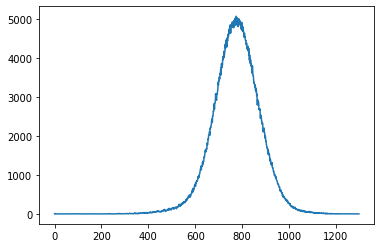

In [14]:
f = open('out1.txt', 'r')
for line in f:
    xx = line.split(sep=" ")
    x = []
    for y in xx:
        if(y!=''):
            x.append(int(y))
    plt.plot(x)
    plt.show()

Данная гистограмма распределений расстояний между статьями не имеет выраженных двух пиков (как ожидалось)


kos:

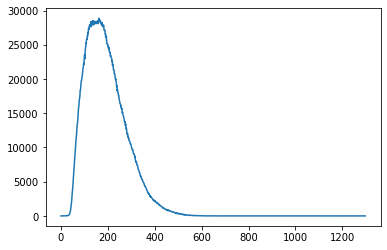

In [15]:
f = open('out2.txt', 'r')
for line in f:
    xx = line.split(sep=" ")
    x = []
    for y in xx:
        if(y!=''):
            x.append(int(y))
    plt.plot(x)
    plt.show()

Попробуем алгоритм кратчайшего незамкнутого пути. Почему? Он самый простой для реализации и предлагает контроль за числом классов. Наверное в нашем случае, что видно по BarChart-у,лучше мин-максить функционалы внутрикластерного и междукластерного расстояния, так как исходя из этого графика, возможно наличие достаточно толстых перемычек между классами